## Class

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx

def draw_networkx_edge_labels_oriented(
	G,
	pos,
	edge_labels = None,
	label_pos = 0.5,
	font_size = 10,
	font_color = "k",
	font_family = "sans-serif",
	font_weight = "normal",
	alpha = None,
	bbox = None,
	horizontalalignment = "center",
	verticalalignment = "center",
	ax=None,
	rotate = True,
	clip_on = True,
	rad = 0
):
	"""Draw edge labels.

	Parameters
	----------
	G : graph
		A networkx graph

	pos : dictionary
		A dictionary with nodes as keys and positions as values.
		Positions should be sequences of length 2.

	edge_labels : dictionary (default={})
		Edge labels in a dictionary of labels keyed by edge two-tuple.
		Only labels for the keys in the dictionary are drawn.

	label_pos : float (default=0.5)
		Position of edge label along edge (0=head, 0.5=center, 1=tail)

	font_size : int (default=10)
		Font size for text labels

	font_color : string (default='k' black)
		Font color string

	font_weight : string (default='normal')
		Font weight

	font_family : string (default='sans-serif')
		Font family

	alpha : float or None (default=None)
		The text transparency

	bbox : Matplotlib bbox, optional
		Specify text box properties (e.g. shape, color etc.) for edge labels.
		Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

	horizontalalignment : string (default='center')
		Horizontal alignment {'center', 'right', 'left'}

	verticalalignment : string (default='center')
		Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

	ax : Matplotlib Axes object, optional
		Draw the graph in the specified Matplotlib axes.

	rotate : bool (deafult=True)
		Rotate edge labels to lie parallel to edges

	clip_on : bool (default=True)
		Turn on clipping of edge labels at axis boundaries

	Returns
	-------
	dict
		`dict` of labels keyed by edge

	Examples
	--------
	>>> G = nx.dodecahedral_graph()
	>>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

	Also see the NetworkX drawing examples at
	https://networkx.org/documentation/latest/auto_examples/index.html

	See Also
	--------
	draw
	draw_networkx
	draw_networkx_nodes
	draw_networkx_edges
	draw_networkx_labels
	"""
	import matplotlib.pyplot as plt
	import numpy as np

	if ax is None:
		ax = plt.gca()
	if edge_labels is None:
		labels = {(u, v): d for u, v, d in G.edges(data=True)}
	else:
		labels = edge_labels
	text_items = {}
	for (n1, n2), label in labels.items():
		(x1, y1) = pos[n1]
		(x2, y2) = pos[n2]
		(x, y) = (
			x1 * label_pos + x2 * (1.0 - label_pos),
			y1 * label_pos + y2 * (1.0 - label_pos),
		)
		pos_1 = ax.transData.transform(np.array(pos[n1]))
		pos_2 = ax.transData.transform(np.array(pos[n2]))
		linear_mid = 0.5 * pos_1 + 0.5 * pos_2
		d_pos = pos_2 - pos_1
		rotation_matrix = np.array([(0,1), (-1,0)])
		ctrl_1 = linear_mid + rad * rotation_matrix@d_pos
		ctrl_mid_1 = 0.5 * pos_1 + 0.5 * ctrl_1
		ctrl_mid_2 = 0.5 * pos_2 + 0.5 * ctrl_1
		bezier_mid = 0.5 * ctrl_mid_1 + 0.5*ctrl_mid_2
		(x, y) = ax.transData.inverted().transform(bezier_mid)

		if rotate:
			# in degrees
			angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
			# make label orientation "right-side-up"
			if angle > 90:
				angle -= 180
			if angle < -90:
				angle += 180
			# transform data coordinate angle to screen coordinate angle
			xy = np.array((x, y))
			trans_angle = ax.transData.transform_angles(
				np.array((angle,)), xy.reshape((1, 2))
			)[0]
		else:
			trans_angle = 0.0
		# use default box of white with white border
		if bbox is None:
			bbox = dict(boxstyle = "round", ec = (1.0, 1.0, 1.0), fc = (1.0, 1.0, 1.0))
		if not isinstance(label, str):
			label = str(label)  # this makes "1" and 1 labeled the same

		t = ax.text(
			x,
			y,
			label,
			size = font_size,
			color = font_color,
			family = font_family,
			weight = font_weight,
			alpha = alpha,
			horizontalalignment = horizontalalignment,
			verticalalignment = verticalalignment,
			rotation = trans_angle,
			transform = ax.transData,
			bbox = bbox,
			zorder = 1,
			clip_on = clip_on,
		)
		text_items[(n1, n2)] = t

	ax.tick_params(
		axis = "both",
		which = "both",
		bottom = False,
		left = False,
		labelbottom = False,
		labelleft = False,
	)

	return text_items

In [3]:
class map():
	def __init__(self):
		"""
		description:
			Inizialization of an empty map (the map() class implements
			a graph structure with dictionaries).
		syntax:
			m = map()
		"""
		self._vertices = {}
		self._coordinates = {}

	def insert_vertex(self, v, coord):
		""" 
		description:
			Insert a vertex v to the graph, it adds an entry corresponding 
			to v in the dictionary m._vertices and an entry with its 
			coordinates in the dictionary m._coordinates. The coordinates
			are supposed to be a tuple with lenght 2.
		syntax:
			m.insert_vertex(v, coord)	
		"""
		if v not in self._vertices:
			self._vertices[v] = set()
			self._coordinates[v] = coord
	def remove_vertex(self, v):
		""" 
		description:
			Remove a vertex v to the graph, it removes the entry 
			corresponding to v in both the dictionaries 
			(m._vertices and m._coordinates).
		syntax:
			m.remove_vertex(v)	
		"""
		self._vertices.pop(v, None)
		self._coordinates.pop(v, None)
		for u in self._vertices:
			self._vertices[u].discard(v)
	def insert_edge(self, edge, weight):
		""" 
		description:
			Add an edge to the graph, it assumes that edge is of type tuple.
		syntax:
			m.insert_edge(edge, weight)
		"""
		weight = float(weight)
		u, v = tuple(edge)
		self._vertices[u].add((v, weight))
	def remove_edge(self, edge):
		""" 
		description:
			Remove an edge from the graph, it assumes that edge is of type tuple.
		syntax:
			m.remove_edge(edge, weight)
		"""
		u, v = tuple(edge)
		for vertex in self._vertices[u]:
			if vertex[0] == v:
					self._vertices[u].discard(vertex)
					return

	def vertices(self):
		""" 
		description:
			Returns a list of tuples containing all the vertices of the graph and 
			their relative coordinates.
		syntax:
			m.vertices()
		"""
		return list((self._vertices.keys(), self._coordinates.values()))
	def edges(self):
		""" 
		description:
			Returns a set of tuples containing all the edges of the graph.
			Each tuple is a triple: (source, destination, weight).
		syntax:
			m.edges()
		"""
		_edges = set()
		for u in self._vertices:
			for v in self._vertices[u]:
				_edges.add((u, v[0], v[1]))
		return _edges
	def incident_edges(self, u):
		""" 
		description:
			Returns a set of tuples containing all the edges inciddent on 
			a vertex. Each tuple is a triple: (source, destination, weight).
		syntax:
			m.incident_edges(v)
		"""
		_incident_edges = set()
		if u in self._vertices:
			for v in self._vertices[u]:
				_incident_edges.add((u, v[0], v[1]))
		return _incident_edges

	def neighbours(self, v):
		""" 
		description:
			Returns a set containing the neighbours of a vertex v (tuples).
		syntax:
			m.neighbours(v)
		"""
		if v in self._vertices:
			return self._vertices[v]
		return set()
	def check_adjacent(self, u, v):		
		""" 
		description:
			Check whether the vertices u and v are adjacent in the graph, 
			i.e. if exists an edge from u to v. Returns a boolean value.
		syntax:
			m.check_adjacent(u, v)
		"""
		if u not in self._vertices:
			return False
		for vertex in self._vertices[u]:
			if vertex[0] == v:
				return True
		return False

	def load(self, filename):
		""" 
		description:
			Load the map from source file (filename), correctly formatted, i.e.
			first one line per vertex containing id and coordinates
			(id coord_x coord_y), then a blank line and finally one line per edge,
			composed as follows: (u v weight).
		syntax:
			m.load(filename)
		"""
		with open(filename) as file:
			lines = file.readlines()
		flag = False
		for i in range(len(lines)):
			if lines[i] == "\n":
				flag = True
				continue
			if not flag:
				v, coord_x, coord_y = lines[i].split()				
				self.insert_vertex(v, (float(coord_x), float(coord_y)))
			else:	
				u, v, weight = lines[i].split()
				self.insert_edge((u, v), float(weight))

	def draw(self, path = [], filename = "",
		arc_rad = 0.25, font_size = 8, node_size = 1000, asp = 1, figure_size = 15):
		""" 
		description:
			Draw (and save) the map m and optionally a path in the map m. 
			The path is supposed to be a list of the vertices to traverse.
			E.g. path = [a, c, b, e].
			Several additional parameters can be setted:
				- arc_rad := angle of edges (in radiants)
				- font_size := font size of all the labels
				- node_size := size of the nodes
				- asp := aspect of the axis (1:1 by default)
				- figure_size := size of the figure
		syntax:
			m.draw_path(path = path, filename = filename)
		"""
		plt.figure(1, figsize = (figure_size, figure_size))
		plt.gca().set_aspect("equal")
		m_draw = nx.DiGraph()
		for e in self.edges():
			m_draw.add_edge(e[0], e[1], weight = e[2])   
		edges_path = list(zip(path, path[1:]))
		weight_labels = nx.get_edge_attributes(m_draw, "weight")
		edge_colors = ["black" if not edge in edges_path else "red" for edge in m_draw.edges]
		coordinates = {key: (self._coordinates[key][0], self._coordinates[key][1] * asp) for key in self._coordinates.keys()}
		nx.draw(m_draw, coordinates,
			with_labels = True, font_size = font_size, node_size = node_size, node_color = "lightgray", edgecolors = "black",
			connectionstyle = f"arc3, rad = {arc_rad}", edge_color = edge_colors)
		# nx.draw_networkx_edge_labels(m_draw, coordinates,
		# 	edge_labels = weight_labels, label_pos = 0.5, font_size = font_size * 0.8)
		draw_networkx_edge_labels_oriented(m_draw, coordinates,
			edge_labels = weight_labels, label_pos = 0.5, font_size = font_size * 0.8, rad = arc_rad, verticalalignment = "center")
		if not filename == "": 
			plt.savefig("maps/" + filename + ".png", dpi = 300, bbox_inches = "tight")
			plt.show()

## Map

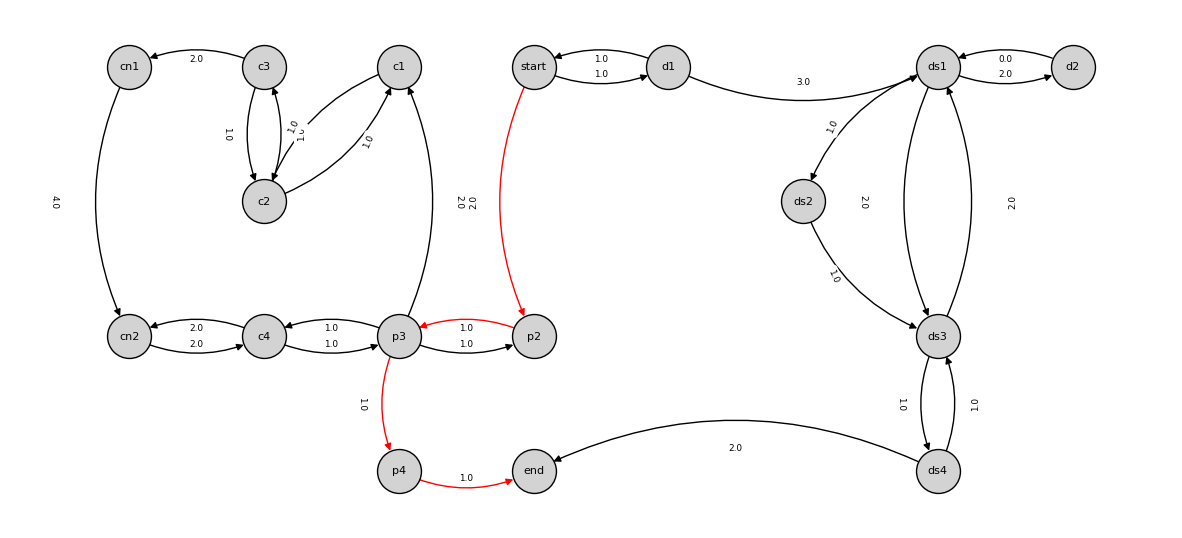

In [4]:
m = map()
map_file = "map_1"
m.load("maps/" + map_file + ".map")
m.draw(path = ["start", "p2", "p3", "p4", "end"], filename = map_file,
    figure_size = 15)